In [1]:
# Using Python 3.8.3

# DS libraries
import pandas as pd
import numpy as np

# CSV readers
import csv

# Datavis: use matplotlib
import matplotlib.pyplot as plt


In [2]:
# Get the players and their batting stats (regular season only)
batstats = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv",sep=',')
slugppl = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv",sep=',')

In [3]:
slugppl.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,20247.000000,20079.000000,19939.000000,9980.000000,9979.000000,9978.000000,19542.000000,19622.000000
mean,1935.213612,6.631555,15.617233,1966.939379,6.487624,15.527460,187.959574,72.357915
std,43.013843,3.463773,8.762274,33.285996,3.532900,8.791192,22.431614,2.617187
min,1820.000000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000
25%,1897.000000,4.000000,8.000000,1943.000000,3.000000,8.000000,172.000000,71.000000
50%,1943.000000,7.000000,16.000000,1969.000000,6.000000,15.000000,185.000000,72.000000
75%,1974.000000,10.000000,23.000000,1994.000000,10.000000,23.000000,200.000000,74.000000
max,2001.000000,12.000000,31.000000,2021.000000,12.000000,31.000000,320.000000,83.000000


In [4]:
# batstats.describe()
batstats

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
batstats.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108033.000000,106421.000000,85248.000000,108789.000000,106689.000000,72139.000000,105973.000000,102721.000000,72686.000000,83348.000000
mean,1967.221631,1.078914,50.740488,139.241320,18.483496,36.388605,6.202024,1.247075,2.850150,16.790388,2.918775,1.177353,12.842907,20.559814,1.055227,1.057958,2.197087,1.022893,2.893495
std,39.747437,0.286916,46.889589,183.602089,28.043230,52.188884,9.627314,2.595462,6.368678,26.225046,7.608039,2.682099,20.595082,28.514873,2.709589,2.291269,4.154759,1.930262,4.672691
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1937.000000,1.000000,12.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1976.000000,1.000000,34.000000,46.000000,4.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2001.000000,1.000000,79.000000,224.000000,27.000000,56.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2020.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


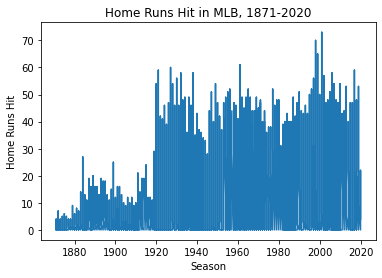

In [9]:
plt.plot(batstats.yearID, batstats.HR)
plt.xlabel("Season")
plt.ylabel("Home Runs Hit")
plt.title("Home Runs Hit in MLB, 1871-2020")
plt.show()